# Árbol de decisión

Según el siguiente árbol de decisión, analice y responda:

![Obama-Clinton decision tree](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/obama_clinton_tree.jpg)

## 1.1 ¿Qué son las observaciones? ¿Cuántas observaciones hay?


Las observaciones en este arbol de decisión son los condados de Estados unidos excluyendo los condados de los estados Alaska, Hawaii, Kansas, Nebraska, New Mexico, North Dakota, Texas por ende son solo 2.241 condados.

## 1.2 ¿Cuál es la variable de respuesta?


Según el arbol de decisión, la variable respuesta es quien va a ganar las elecciones : Obama o Clinton

## 1.3 ¿Cuáles son las características?¿Cuál es la característica más predictiva?


La característica más predictiva es si el condado tiene más del 20% población negra, otras características son :


1.   Si la tasa de graduación de la escuela secundaria es superior al 78%
2.   Si la tasa de graduación de la escuela secundaria es superior al 87%
3.   Donde esta ubicado el condado, si en el noroeste - sur o en el oeste - medio oeste 
4.   Porcentaje de hogares pobres en el año 2000
5.   La densidad de la población
6.   Si en las votaciones del 2004 en ese condado gano Bush o Kerry Badly



## 1.4 ¿Cuál es la predicción de clase para el siguiente condado con los siguientes datos: 15% de afroamericanos, 90% de tasa de graduación en la escuela secundaria, ubicado en el Sur, alta pobreza, alta densidad de población?


La predicción de clase para dicho condado es que gana Omaba 185 a 36.

## 1.5 ¿Cuál es el chance predicha para ese mismo condado anteriormente descrito?

Dado que el chance o el odds es la razón entre un resultado y todos los demás resultados, para dicho condado es 5.1 más probable que gane Obama en vez de Clinton.

## SVM


Para esta tarea consideramos un conjunto de observaciones sobre una serie de variedades de vino tinto y blanco que implican sus propiedades químicas y su clasificación por parte de los catadores. La industria del vino ha experimentado un gran crecimiento en los últimos tiempos debido al aumento del consumo social. El precio del vino depende de un concepto bastante abstracto de apreciación del vino por parte de los catadores, cuya opinión puede tener un alto grado de variabilidad. El precio del vino depende en cierta medida de este factor tan volátil. Otro factor clave en la certificación y evaluación de la calidad del vino son las pruebas fisicoquímicas, que se realizan en laboratorio y tienen en cuenta factores como la acidez, el nivel de pH, la presencia de azúcar y otras propiedades químicas. Para el mercado del vino, sería interesante que la calidad humana de la cata pudiera relacionarse con las propiedades químicas del vino para que el proceso de certificación y evaluación de la calidad estuviera más controlado.

Se dispone de dos conjuntos de datos, uno de los cuales se refiere al vino tinto y cuenta con 1.599 variedades diferentes, y el otro, al vino blanco, con 4.898 variedades. Todos los vinos se producen en una zona concreta de Portugal. Se recogen datos sobre 12 propiedades diferentes de los vinos, una de las cuales es la calidad, basada en datos sensoriales, y el resto son propiedades químicas de los vinos, como la densidad, la acidez, el contenido de alcohol, etc. Todas las propiedades químicas de los vinos son variables continuas. La calidad es una variable ordinal con una clasificación posible de 1 (peor) a 10 (mejor). Cada variedad de vino es catada por tres catadores independientes y la clasificación final asignada es la mediana de la clasificación dada por los catadores.

Se espera que un modelo predictivo desarrollado a partir de estos datos sirva de orientación a los viñedos en cuanto a la calidad y el precio que se espera obtener de sus productos sin depender en gran medida de la volatilidad de los catadores.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_r = pd.read_csv('https://raw.githubusercontent.com/prof-tatiana-gutierrez/DatosMD/master/Wine_data_red.csv')
data_w = pd.read_csv('https://raw.githubusercontent.com/prof-tatiana-gutierrez/DatosMD/master/Wine_data_white.csv')

In [ ]:
data = data_w.assign(type = 'white')

data = data.append(data_r.assign(type = 'red'), ignore_index=True)
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2174,7.4,0.19,0.30,12.80,0.053,48.5,229.0,0.99860,3.14,0.49,9.1,7,white
1391,6.2,0.16,0.47,1.40,0.029,23.0,81.0,0.99000,3.26,0.42,12.2,6,white
786,7.7,0.34,0.28,11.00,0.040,31.0,117.0,0.99815,3.27,0.29,9.2,6,white
2625,4.5,0.19,0.21,0.95,0.033,89.0,159.0,0.99332,3.34,0.42,8.0,5,white
3175,7.8,0.21,0.34,11.90,0.039,55.0,140.0,0.99590,3.02,0.31,10.3,6,white


In [ ]:
data.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
data.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

# Ejercicio 2.1

Mostrar la tabla de frecuencias de la calidad por tipo de vino.

In [ ]:
tab1 = pd.crosstab(data['quality'], data['type'])
tab1

type,red,white
quality,,
3,10,20
4,53,163
5,681,1457
6,638,2198
7,199,880
8,18,175
9,0,5


# Ejercicio 2.2

Teniendo en cuenta todas las variables:

* Crear un objetivo binario para cada tipo de vino, haciendo la transformación necesaria para ingresar la información al modelo.
* Crear una SVM que prediga el tipo de vino
* Evalúe con F1, AUC-ROC y log-loss


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
data['type'] = data['type'].map({'white':0, 'red':1}).astype(np.int)
X = data.drop(['type'], axis = 1)
y = data['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2022)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
modSVC = SVC()
modSVC.fit(X_train, y_train)
scv_pred = modSVC.predict(X_test)

AUC = metrics.roc_auc_score(y_test, scv_pred)
F1 = metrics.f1_score(y_test, scv_pred)
LOG = metrics.log_loss(y_test, scv_pred)

In [ ]:

datos = [AUC,F1,LOG]
columnas = ['MÉTRICA'] # definimos los nombres de las columnas
filas = ['AUC', 'F1', 'Log_loss'] # definimos los nombres de las filas

df = pd.DataFrame(datos, columns=columnas, index=filas)




# Ejercicio 2.3

* Probar la SVM utilizando los diferentes kernels ('poly', 'rbf', 'sigmoid')
* Evalúe con F1, AUC-ROC y log-loss


In [ ]:
kernels = ['poly','rbf','sigmoid']
AUC2 = []
F12 = []
log2 = []
for f in kernels:
    modSVC2 = SVC(kernel=f)
    modSVC2.fit(X_train,y_train)
    scv_pred2 = modSVC2.predict(X_test)
    AUC2.append(metrics.roc_auc_score(y_test, scv_pred2))
    F12.append(np.sqrt(metrics.f1_score(y_test, scv_pred2)))
    log2.append(np.sqrt(metrics.log_loss(y_test, scv_pred2)))
print(AUC2)
print(F12)
print(log2)

[0.8883168581962583, 0.8784676979547317, 0.6927182833201074]
[0.9074852129730301, 0.9158719836679894, 0.7291121574130556]
[1.7172995248081817, 1.5718991439215957, 2.770978932845982]


In [ ]:
final2 = pd.DataFrame()
final2['AUC'] = AUC2
final2['F1'] = F12
final2['Log_loss'] = log2
final2.index = kernels

# Ejercicio 2.4
* Utilizando el mejor SVM del punto anterior encontrar los parámetros que da el mejor rendimiento teniendo en cuenta los siguientes hiperparámetros
'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]
* Evalúe cada modelo con F1, AUC-ROC y log-loss

Nota: Para los valores de C y gamma, deben realizar todas las posibles combinaciones entre estas dos variables.

In [26]:

Ci = [0.1, 1, 10, 100, 1000]
Ga = [0.01, 0.001, 0.0001]
AUC3 = []
F13 = []
log3 = []
for f in Ci:
  for k in Ga:
      modSVC3 = SVC(kernel= 'rbf', C = f, gamma = k)
      modSVC3.fit(X_train,y_train)
      scv_pred3 = modSVC3.predict(X_test)
      AUC3.append(metrics.roc_auc_score(y_test, scv_pred3))
      F13.append(np.sqrt(metrics.f1_score(y_test, scv_pred3)))
      log3.append(np.sqrt(metrics.log_loss(y_test, scv_pred3)))
print(AUC3)
print(F13)
print(log3)

[0.8762405337356597, 0.8758404932417648, 0.8628955094229946, 0.9101166158860162, 0.8897945587961557, 0.8838266077545809, 0.946724403123255, 0.9256888044177534, 0.9031395831088208, 0.9665419193453052, 0.970682746661703, 0.9341794597983797, 0.9692736244321873, 0.9915093446193738, 0.9812960658874859]
[0.9152575239125511, 0.9131867468388248, 0.904181320117333, 0.9388055880763546, 0.9234390754280422, 0.9199384225093443, 0.9615561158530614, 0.949301074113599, 0.9339334486684465, 0.9745547127629919, 0.9793962251010829, 0.9563330300275151, 0.9755064854862865, 0.9935064248313796, 0.987689313218155]
[1.5718987526273926, 1.5970513509010844, 1.662263316593178, 1.363742345163536, 1.5115848940498244, 1.5377233644086679, 1.1055102916812343, 1.252014684004239, 1.411607327389533, 0.9075385400604994, 0.8149928767253924, 1.1640412331125027, 0.8927813434629681, 0.46103012545403105, 0.6312902806102219]


In [27]:
import itertools 
Combinaciones = list(itertools.product(Ci,Ga)) 
Combinaciones

[(0.1, 0.01),
 (0.1, 0.001),
 (0.1, 0.0001),
 (1, 0.01),
 (1, 0.001),
 (1, 0.0001),
 (10, 0.01),
 (10, 0.001),
 (10, 0.0001),
 (100, 0.01),
 (100, 0.001),
 (100, 0.0001),
 (1000, 0.01),
 (1000, 0.001),
 (1000, 0.0001)]

In [28]:
final = pd.DataFrame()
final['AUC'] = AUC3
final['F1'] = F13
final['Log_loss'] = log3
final.index = Combinaciones


# Ejercicio 2.5

Compare los resultados con todos los anteriores modelos y eliga ¿Cuál algoritmo con cuáles hiperparámetros es el que tiene mejor rendimiento según la puntuación F1, AUC-ROC y log-loss?

In [ ]:
df

,MÉTRICA
AUC,0.878468
F1,0.838821
Log_loss,2.470867


In [ ]:
final2

,AUC,F1,Log_loss
poly,0.888317,0.907485,1.717300
rbf,0.878468,0.915872,1.571899
sigmoid,0.692718,0.729112,2.770979


In [29]:
final

,AUC,F1,Log_loss
"(0.1, 0.01)",0.876241,0.915258,1.571899
"(0.1, 0.001)",0.875840,0.913187,1.597051
"(0.1, 0.0001)",0.862896,0.904181,1.662263
"(1, 0.01)",0.910117,0.938806,1.363742
"(1, 0.001)",0.889795,0.923439,1.511585
"(1, 0.0001)",0.883827,0.919938,1.537723
"(10, 0.01)",0.946724,0.961556,1.105510
"(10, 0.001)",0.925689,0.949301,1.252015
"(10, 0.0001)",0.903140,0.933933,1.411607
"(100, 0.01)",0.966542,0.974555,0.907539


Teniendo en cuenta la métrica "AUC" que indica cuánto es capaz el modelo de distinguir entre clases. Cuanto mayor sea el AUC, mejor será el modelo para predecir 0 clases como 0 y 1 clases como 1. Por ende, el mejor modelo según el AUC es cuando se utiliza el kernels 'rbf' con C = 1000 y Gamma = 0.001 con una probabilidad del 88.83%.
Además, teniendo en cuenta la métrica "F1" que es la media armónica de la precisión y la recuperación dado que F1 alcanza su mejor valor en 1 y la peor puntuación en 0 el mejor modelo según "F1" es cuando se utiliza el kernels 'rbf' con C = 1000 y Gamma = 0.001 con una puntuación del 0.915872.
Asimismo, si revisamos la métrica "Log loss" que indica la pérdida logarítmica también indica que el mejor modelo es cuando se utiliza el kernels 'rbf' con C = 1000 y Gamma = 0.001 con un valor de 0.461030.

Por ende, se puede concluir que el mejor modelo es cuando se  ejecuta usando el kernels 'rbf ',  con C = 1000 y Gamma = 0.001.



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


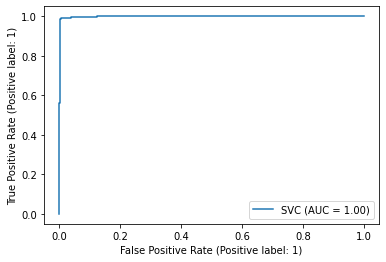

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
modSVCf = SVC(kernel='rbf', C = 1000,  gamma = 0.001 )
modSVCf.fit(X_train,y_train)
plot_roc_curve(modSVCf, X_test, y_test) 